<a href="https://colab.research.google.com/github/evi03/MechineLearning/blob/main/Mechine_Learning_JS11_EVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA: EVI AMALIA MIDFIA**

**KELAS: TI-3A**

**ABSEN: 13**

**NIM: 2141720030**

**Link Repository Github:** https://github.com/evi03/MechineLearning.git

# **PRAKTIKUM 1**

#### **Langkah 1 - Import Library**

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

#### **Langkah 2 - Pra Pengolahan Data**

Langkah 2.1. Pra Pengolahan Data Training

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Tugas Kuliah /Pembelajaran Mesin/dataset/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8010 images belonging to 2 classes.


Langkah 2.2. Pra Pengolahan Data Testing

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Tugas Kuliah /Pembelajaran Mesin/dataset/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


#### **Langkah 3 - Pembuatan Model CNN**

Langkah 3.1.  - Inisiasi Model CNN

In [5]:
cnn = tf.keras.models.Sequential()

Langkah 3.2. - Pembuatan Layer Konvolusi 1

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

Langkah 3.3 - Pembuatan Layer Pooling 1

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Langkah 3.5 - Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

Langkah 3.6 - Fully Connected Layer 1 (Input)

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

Langkah 3.7 - Fully Connected Layer 2 (Output)

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Langkah 3.8 - Compile Model CNN

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### **Langkah 4 - Fit CNN**

In [13]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
251/251 [==============================] - 1936s 8s/step - loss: 0.6621 - accuracy: 0.5896 - val_loss: 0.6082 - val_accuracy: 0.6810
Epoch 2/25
251/251 [==============================] - 39s 155ms/step - loss: 0.6027 - accuracy: 0.6742 - val_loss: 0.5957 - val_accuracy: 0.6805
Epoch 3/25
251/251 [==============================] - 39s 155ms/step - loss: 0.5728 - accuracy: 0.7014 - val_loss: 0.5795 - val_accuracy: 0.7055
Epoch 4/25
251/251 [==============================] - 44s 174ms/step - loss: 0.5378 - accuracy: 0.7258 - val_loss: 0.5572 - val_accuracy: 0.7215
Epoch 5/25
251/251 [==============================] - 39s 156ms/step - loss: 0.5234 - accuracy: 0.7396 - val_loss: 0.4926 - val_accuracy: 0.7625
Epoch 6/25
251/251 [==============================] - 38s 153ms/step - loss: 0.4942 - accuracy: 0.7598 - val_loss: 0.4701 - val_accuracy: 0.7785
Epoch 7/25
251/251 [==============================] - 39s 156ms/step - loss: 0.4752 - accuracy: 0.7669 - val_loss: 0.4876 - val_acc

#### **Langkah 5 - Prediksi dengan 1 Citra**

In [14]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Tugas Kuliah /Pembelajaran Mesin/dataset/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 213ms/step


# **PRAKTIKUM 2**

#### **Langkah 1 - Load Library**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#### **Langkah 2 - Unduh Dataset CIFAR**

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 13s 0us/step


#### **Langkah 3 - Verifikasi Data**

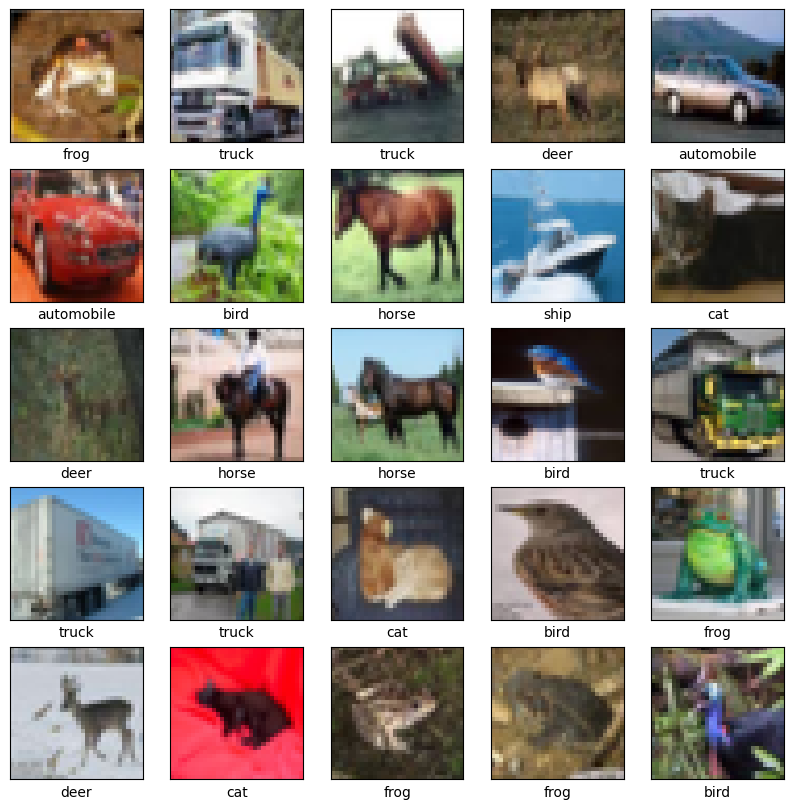

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

#### **Langkah 4 - Buat Model CNN**

Langkah 4.1. - Buat Layer Konvolusi

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Langkah 4.2. - Cek Arsitektur Konvolusi

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

Langkah 4.3. - Tambahkan Layer Fully Connected

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Langkah 4.4. - Cek Arsitektur Model CNN

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Langkah 4.5. - Compile Model CNN

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Langkah 5 - Fit Model**

In [10]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 24s 7ms/step - loss: 1.5339 - accuracy: 0.4416 - val_loss: 1.2448 - val_accuracy: 0.5582
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1602 - accuracy: 0.5889 - val_loss: 1.1587 - val_accuracy: 0.5955
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0012 - accuracy: 0.6468 - val_loss: 0.9651 - val_accuracy: 0.6628
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8959 - accuracy: 0.6871 - val_loss: 0.9428 - val_accuracy: 0.6643
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8197 - accuracy: 0.7130 - val_loss: 0.8863 - val_accuracy: 0.6920
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7617 - accuracy: 0.7321 - val_loss: 0.8883 - val_accuracy: 0.7020
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7172 - accuracy: 0.7492 - val_loss: 0.8601 - val_accura

#### **Langkah 6 - Evaluasi Model**

313/313 - 1s - loss: 0.9017 - accuracy: 0.7081 - 694ms/epoch - 2ms/step


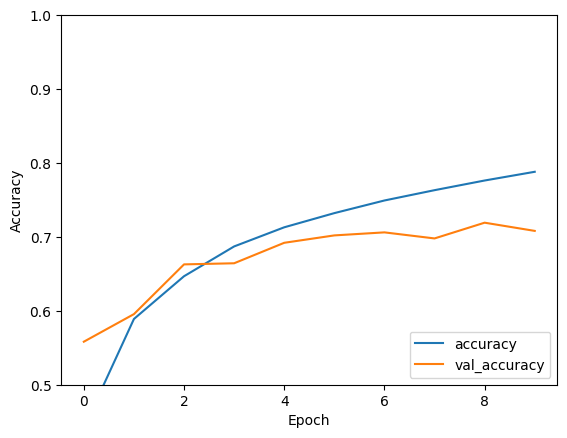

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

#### **Langkah 7 - Cetak Hasil Akurasi**

In [12]:
print(test_acc)

0.7081000208854675


# **TUGAS**

* Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.
* Buatlah model CNN untuk klasifikasi dataset MNIST.

### **Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.**

**Langkah 1 - Load Library**

In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**2. Load CIFAR-10 dataset**

In [14]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

**3. Normalisasikan nilai piksel menjadi antara 0 dan 1**

In [15]:
train_images, test_images = train_images / 255.0, test_images / 255.0

**4. Buat model CNN**

In [16]:
model = models.Sequential()

**5. Tambahkan Lapisan Konvolusional**

In [17]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

**6. Ratakan dan tambahkan Lapisan Terhubung Sepenuhnya**

In [18]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout layer to reduce overfitting
model.add(layers.Dense(10, activation='softmax'))

**7. Compile modelnya**

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**8. Latih model dengan lebih banyak epoch**

In [20]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 12s 6ms/step - loss: 1.6595 - accuracy: 0.3891 - val_loss: 1.3269 - val_accuracy: 0.5220
Epoch 2/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2879 - accuracy: 0.5405 - val_loss: 1.1423 - val_accuracy: 0.5893
Epoch 3/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1292 - accuracy: 0.6010 - val_loss: 1.0616 - val_accuracy: 0.6224
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0287 - accuracy: 0.6414 - val_loss: 1.0019 - val_accuracy: 0.6478
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9455 - accuracy: 0.6697 - val_loss: 0.9306 - val_accuracy: 0.6693
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8757 - accuracy: 0.6951 - val_loss: 0.8610 - val_accuracy: 0.7044
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8305 - accuracy: 0.7120 - val_loss: 0.8849 - val_accur

**9. Evaluasi hasil model**

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 0.9476 - accuracy: 0.7199 - 702ms/epoch - 2ms/step
Test accuracy: 0.7199000120162964


**10. Plot training history**

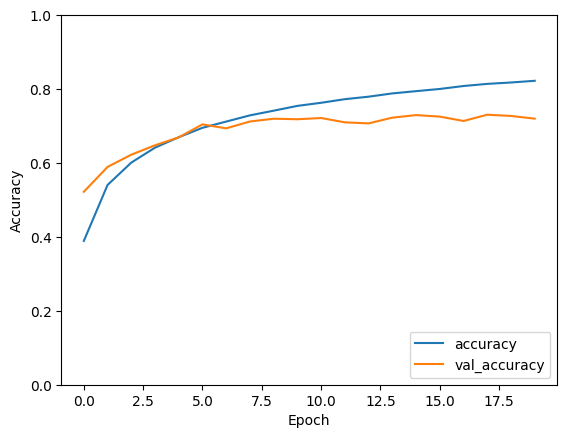

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

### **Buatlah model CNN untuk klasifikasi dataset MNIST.**

**1. Import Library**

In [23]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**2. Load Mnist dataset**

In [24]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


**3. Normalisasikan nilai piksel menjadi antara 0 dan 1**

In [25]:
train_images, test_images = train_images / 255.0, test_images / 255.0

**4. Buat model CNN**

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

**5. Compile modelnya**

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**6. Latih model dengan lebih banyak epoch**

In [28]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1506 - accuracy: 0.9538 - val_loss: 0.0516 - val_accuracy: 0.9831
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0486 - accuracy: 0.9852 - val_loss: 0.0474 - val_accuracy: 0.9837
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0354 - accuracy: 0.9886 - val_loss: 0.0442 - val_accuracy: 0.9873
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0261 - accuracy: 0.9917 - val_loss: 0.0326 - val_accuracy: 0.9899
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0.0374 - val_accuracy: 0.9893
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0169 - accuracy: 0.9943 - val_loss: 0.0312 - val_accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0139 - accuracy: 0.9957 - val_loss: 0.0313 - val_accura

**7. Evaluasi hasil model**

In [29]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 0.0312 - accuracy: 0.9928 - 671ms/epoch - 2ms/step
Test accuracy: 0.9927999973297119


**8. Plot training history**

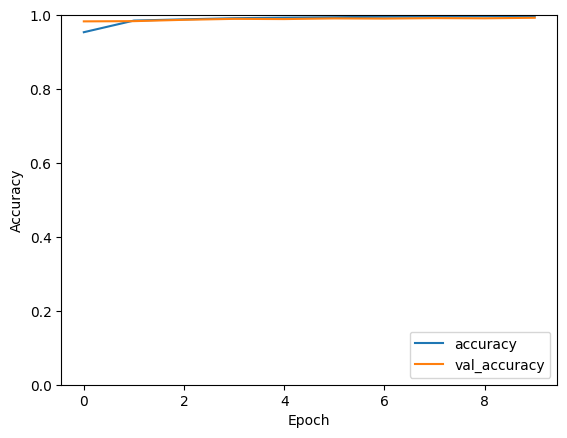

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()